**600035 - Numerical Modelling and Simulation**

**Assessment 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Task 1**

In [2]:
# Define value of constants.

k_B = 1.38066e-23 # Bolzmann constant (in J/K).
h = 6.62608e-34 # Planck constant (in J.s).
c = 2.99792e8 # Speed of Light (in m/s).

# Define equation 1.

def specrad1(v,T):
    '''
    Accepts a frequency v (in Hz) and a temperature T (in Kelvin).
    Returns the associated Sprectral Radiance for a black body (in
    W.s^-1.m^-2.Hz^-1.sr^-1) according to Planck's Radiation Law.
    '''
    B = (2*h*v**3)/((c**2)*(np.exp((h*v)/(k_B*T))-1))
    return B

# Define equation 2.

def specrad2(v,T):
    '''
    Accepts a frequency v (in Hz) and a temperature T (in Kelvin).
    Returns the associated Sprectral Radiance for a black body (in 
    W.s^-1.m^-2.Hz^-1.sr^-1) according to the low frequency 
    approximation for Planck's Radiation Law.
    '''
    B = (2*k_B*T*v**2)/(c**2)
    return B

In [3]:
# Create an array of 500 frequencies evenly spaced between 1 and 10^10 Hz.

N = 500
V = np.linspace(1,10**10,N)

# Using temperature T = 2.73 Kelvin, the black body temperature of the cosmic
# microwave background, determine the spectral radiance for each frequency
# according to both formulae.

SR1 = specrad1(V,2.73)
SR2 = specrad2(V,2.73)

**Task 2**

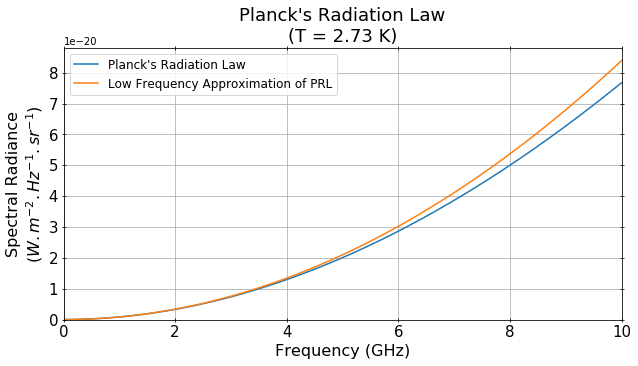

In [4]:
# Create figure and set figure size.

plt.figure(figsize=(10,5))

# Plot the two spectral radiances against the range of frequencies used.

V_GHz = V*10**-9 # Conversion of the frequency array from Hz to GHz.

plt.plot(V_GHz,
         SR1,
         label = "Planck's Radiation Law",)

plt.plot(V_GHz,
         SR2,
         label = "Low Frequency Approximation of PRL")

# Set axis labels and properties.

plt.xlim(V_GHz[0],V_GHz[-1])
plt.ylim(0)

plt.xlabel("Frequency (GHz)",
           fontsize='16')
plt.xticks(size='15')

plt.ylabel("Spectral Radiance\n($W.m^{-2}.Hz^{-1}.sr^{-1}$)",
           fontsize='16')
plt.yticks(size='15')

plt.tick_params(direction='inout',right=True,top=True)

# Set title, legend, and grid.

plt.title("Planck's Radiation Law\n(T = 2.73 K)",
          fontsize='18')
plt.legend(fontsize='12')
plt.grid()

plt.show()

*Discussion:* As stated, the low frequency approximation for Spectral Radiance approximates the Spectral Radiance calculated by Planck's Radiation Law more closely the lower the frequency. At higher frequencies, the approximation is above the true value.

In [5]:
mindif = 100*(1 - SR1[1]/SR2[1])
maxdif = 100*(1 - SR1[-1]/SR2[-1])
print(f"The minmum divergence is {mindif:.3} at the lowest non-zero frequency: {V_GHz[1]:.3} GHz")
print(f"The maximum divergence is {maxdif:.3} at the highest frequency: {V_GHz[-1]:.3} GHz")

The minmum divergence is 0.0176 at the lowest non-zero frequency: 0.02 GHz
The maximum divergence is 8.53 at the highest frequency: 10.0 GHz


To quantify this further, a *for* loop and an *if* statement can be used to locate at which frequency the approximation differs by more than a set tolerance parameter, e.g. 5%.

In [6]:
# Set tolerance.

div_percent = 5
tolerance = 1 - div_percent/100

# Locate where the divergeance exceeds this percentage.

for i in range(N):
    ratio = SR1[i]/SR2[i]
    if ratio < tolerance:
        div_freq = V_GHz[i]
        print(f"At upwards of {div_freq:.2} GHz, the Spectral Radiance approximation differs\n\
by more than {div_percent}% of the true value.")
        break

At upwards of 5.8 GHz, the Spectral Radiance approximation differs
by more than 5% of the true value.


This can be added to the plot as a vertical line, displaying where the approximation starts to break down significantly.

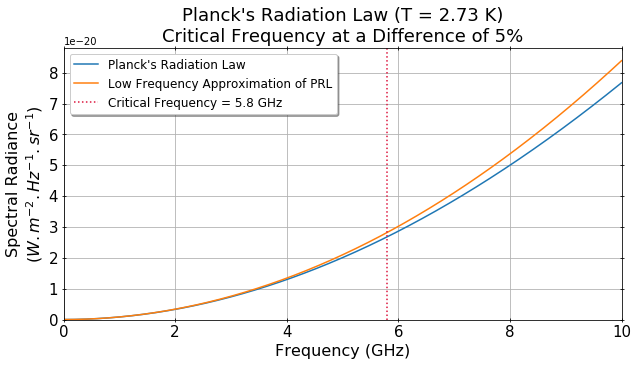

In [7]:
# Create figure and set figure size.

plt.figure(figsize=(10,5))

# Plot the two spectral radiances against the range of frequencies used.

V_GHz = V*10**-9 # Copy of the frequency array in GHz.

plt.plot(V_GHz,
         SR1,
         label = "Planck's Radiation Law",)

plt.plot(V_GHz,
         SR2,
         label = "Low Frequency Approximation of PRL")

# Set axis labels and properties.

plt.xlim(V_GHz[0],V_GHz[-1])
plt.ylim(0)

plt.xlabel("Frequency (GHz)",
           fontsize='16')
plt.xticks(size='15')

plt.ylabel("Spectral Radiance\n($W.m^{-2}.Hz^{-1}.sr^{-1}$)",
           fontsize='16')
plt.yticks(size='15')

plt.tick_params(direction='inout',
                right=True,top=True)

# Add vertical line at the critical frequency.

plt.axvline(div_freq,
            color='crimson',
            linestyle=':',
            label='Critical Frequency = {0:.2} GHz'.format(div_freq))

# Set title, legend, and grid.

plt.title("Planck's Radiation Law (T = 2.73 K)\nCritical Frequency at a Difference of 5%",
          fontsize='18')
plt.legend(fontsize='12',
           shadow = True)
plt.grid()

plt.savefig('Planck_Radiation_Law_fig1.png', bbox_inches='tight')
plt.show()

**Task 3**

In [8]:
# Prepare data to be written to an external file.

Title = "Spectral Radiance calculated by Planck's Radiation Law and its \n\
low frequency approximation at a temperature of T = 2.73 K.\n\n"
Columns = "NB: Spectral Radiance and LF Approx. have units W.m^-2.Hz^-1.sr^-1\n\
Frequency (GHz)      \
Spectral Radiance    \
Low Freq. Approx.    \n"
Data = str()
for i in range(N):
    Data = Data + "\
{0:.5e}          \
{1:.5e}          \
{2:.5e}          \n".format(V_GHz[i],SR1[i],SR2[i])

# Print the data to be written.

print("\
Writing the following to file 'spectral_radiance.txt':\n\
______________________________________________________\n"+
      Title+
      Columns+
      Data)

# Write the data to an external file.

f = open('spectral_radiance.txt','w')
f.write(Title+
        Columns+
        Data)
f.close()

Writing the following to file 'spectral_radiance.txt':
______________________________________________________
Spectral Radiance calculated by Planck's Radiation Law and its 
low frequency approximation at a temperature of T = 2.73 K.

NB: Spectral Radiance and LF Approx. have units W.m^-2.Hz^-1.sr^-1
Frequency (GHz)      Spectral Radiance    Low Freq. Approx.    
1.00000e-09          8.38765e-40          8.38763e-40          
2.00401e-02          3.36792e-25          3.36851e-25          
4.00802e-02          1.34693e-24          1.34741e-24          
6.01202e-02          3.03006e-24          3.03166e-24          
8.01603e-02          5.38582e-24          5.38962e-24          
1.00200e-01          8.41387e-24          8.42128e-24          
1.20240e-01          1.21138e-23          1.21266e-23          
1.40281e-01          1.64854e-23          1.65057e-23          
1.60321e-01          2.15281e-23          2.15585e-23          
1.80361e-01          2.72417e-23          2.72850e-23     